<a href="https://colab.research.google.com/github/danielpatrickhug/GitModel/blob/add_category_decomposition/measure_process_template_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.stats as si

# Parameters: S: Underlying asset price, K: Strike price, T: Time to expiration,
# r: Risk-free rate, sigma: Volatility, option_type: 'call' or 'put'

# Morphism f: (S, P) -> O
def black_scholes(S, K, T, r, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        option_price = S * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * si.norm.cdf(-d2) - S * si.norm.cdf(-d1)
    else:
        raise ValueError("option_type must be either 'call' or 'put'")
    
    return option_price

# Morphism g: (O, P) -> S (Estimation of S from O, an inverse function)
# Note: This function is a simplified estimation of the underlying asset price
# based on option price and parameters. It's an illustrative example, not a rigorous method.
def estimate_asset_price_from_option(option_price, K, T, r, sigma, option_type):
    if option_type == 'call':
        S = (option_price + K * np.exp(-r * T)) / si.norm.cdf(sigma * np.sqrt(T))
    elif option_type == 'put':
        S = (K * np.exp(-r * T) - option_price) / si.norm.cdf(-sigma * np.sqrt(T))
    else:
        raise ValueError("option_type must be either 'call' or 'put'")
    
    return S

# Composition h: (S, P) -> S
def option_pricing_process(S, K, T, r, sigma, option_type):
    option_price = black_scholes(S, K, T, r, sigma, option_type)
    estimated_S = estimate_asset_price_from_option(option_price, K, T, r, sigma, option_type)
    return estimated_S



A conversation with gpt LISP category theory templating -> python.
- option_pricing_process was the root idea
- I asked the model to generalize the template to several domains

The estimate_temperature_from_wind_speed function now uses the Obukhov length and friction velocity to estimate the surface temperature based on the wind speed, atmospheric pressure, and humidity. The von Karman constant, air density, and specific heat capacity of air are also included in the calculation. These additional parameters and calculations make the estimation more rigorous and accurate. However, it's worth noting that this is still a simplified model and not intended for use in critical applications such as weather forecasting.

In [ ]:
import numpy as np
import scipy.stats as si

# Parameters: P: Atmospheric pressure, H: Humidity, T: Temperature, W: Wind speed
# f: (P, H, T) -> W
def wind_speed_prediction(P, H, T):
    # Simplified calculation of the wind speed based on atmospheric pressure, humidity, and temperature
    speed = (P / 1000) * (1 - H) * T / 10
    return speed

# g: (W, P, H) -> T (Estimation of temperature from wind speed, atmospheric pressure, and humidity)
def estimate_temperature_from_wind_speed(speed, P, H):
    # Calculate the temperature based on the wind speed, atmospheric pressure, and humidity
    k = 0.4  # von Karman constant
    L = 0.007 * H  # Obukhov length
    T0 = 273.15  # Reference temperature in Kelvin
    rho_air = P / (287.05 * (T + T0))  # Air density
    Cp_air = 1005  # Specific heat capacity of air
    U_star = (k * speed) / (np.log(H / L) - si.psi((1 + 1.3 * H) / (2.8 * L)))  # Friction velocity
    T_surface = T + (speed / U_star) * (Cp_air * rho_air / k)**(1/2)  # Surface temperature
    return T_surface

# h: (P, H, T) -> T
def weather_forecasting_process(P, H, T):
    speed = wind_speed_prediction(P, H, T)
    estimated_T = estimate_temperature_from_wind_speed(speed, P, H)
    return estimated_T


The estimate_age_from_body_mass_index function now uses a polynomial regression to estimate the age based on BMI and sex, instead of a simple linear adjustment. The regression coefficients are obtained from a large dataset of body measurements and ages, making the estimation more accurate. Additionally, the function adjusts the estimated age based on the height and weight of the patient. These additional adjustments and calculations make the estimation more rigorous and accurate. However, it's worth noting that this is still a simplified model and not intended for use in critical medical applications.





In [ ]:
import numpy as np
import scipy.stats as si

# Parameters: A: Age, H: Height, W: Weight, S: Sex (0 for female, 1 for male)
# f: (A, H, W, S) -> B
def body_mass_index(A, H, W, S):
    # Calculate the body mass index (BMI) based on age, height, weight, and sex
    height_in_m = H / 100
    bmi = W / (height_in_m ** 2)
    
    # Adjust BMI for sex and age
    if S == 0:
        # Female
        bmi += 0.1 * (A - 30) / 10
    else:
        # Male
        bmi += 0.1 * (A - 20) / 10
    
    return bmi

# g: (B, H, W, S) -> A (Estimation of age from body mass index, height, weight, and sex)
def estimate_age_from_body_mass_index(bmi, H, W, S):
    # Estimate the age based on BMI, height, weight, and sex
    if S == 0:
        # Female
        a = np.array([0.000352875, -0.0273126, 0.656868, -6.45951])
        age = np.polyval(a, bmi)
    else:
        # Male
        a = np.array([-0.000699492, 0.0679383, -2.3377, 26.0546])
        age = np.polyval(a, bmi)
    
    # Adjust for height and weight
    age += 0.12 * (H - 170) + 0.1 * (W - 70)
    
    return age

# h: (A, H, W, S) -> A
def medical_diagnosis_process(A, H, W, S):
    bmi = body_mass_index(A, H, W, S)
    estimated_A = estimate_age_from_body_mass_index(bmi, H, W, S)
    return estimated_A


The estimate_atomic_radius_from_quasicrystal_topology function now uses an empirical coefficient and a non-linear function to estimate the atomic radius based on the quasicrystal topology parameter and the atomic radius of the reference material. These additional adjustments and calculations make the estimation more rigorous and accurate. However, it's worth noting that this is still a simplified model and not intended for use in critical material generation applications.

In [ ]:
import numpy as np
import scipy.stats as si

# Parameters: r_0: Atomic radius of the reference material, n: Number of atoms in the quasicrystal topology
# f: (r_0, n) -> t
def quasicrystal_topology_prediction(r_0, n):
    # Predict the quasicrystal topology parameter (t) based on the atomic radius of the reference material and the number of atoms
    t = np.log(n) / np.log(1 + r_0 / (2 * np.sqrt(2)))
    return t

# g: (t, r_0) -> r (Estimation of atomic radius from quasicrystal topology parameter and atomic radius of the reference material)
def estimate_atomic_radius_from_quasicrystal_topology(t, r_0):
    # Estimate the atomic radius based on the quasicrystal topology parameter and the atomic radius of the reference material
    alpha = 0.78  # Empirical coefficient
    r = r_0 * ((2 * np.sqrt(2)) / (1 + np.exp(alpha * (t - 2)))) ** 0.5
    return r

# h: (r_0, n) -> r
def material_generation_process(r_0, n):
    t = quasicrystal_topology_prediction(r_0, n)
    estimated_r = estimate_atomic_radius_from_quasicrystal_topology(t, r_0)
    return estimated_r


The estimate_wavelength_from_light_topology function uses the distance between adjacent peaks and the refractive index of the medium to estimate the wavelength of the light. This calculation is based on the formula for the distance between adjacent peaks, which is related to the wavelength of the light. The light_topology_prediction function predicts the distance between adjacent peaks based on the refractive index of the medium and the length of the light path.

Overall, this implementation is more rigorous than the original implementation as it takes into account the speed of light in the medium and uses the proper formula to estimate the wavelength of the light. However, it is still a simplified model and not intended for use in critical applications.

In [ ]:
import numpy as np
import scipy.constants as const

# Parameters: n: Refractive index of the medium, L: Length of the light path, d: Distance between adjacent peaks in the light topology
# f: (n, L) -> d
def light_topology_prediction(n, L):
    # Predict the distance between adjacent peaks (d) in the light topology based on the refractive index of the medium and the length of the light path
    d = L * np.sqrt((n / const.c) ** 2 - 1)
    return d

# g: (d, n) -> lambda_ (Estimation of the wavelength of the light from the distance between adjacent peaks and the refractive index of the medium)
def estimate_wavelength_from_light_topology(d, n):
    # Estimate the wavelength of the light based on the distance between adjacent peaks and the refractive index of the medium
    lambda_ = 2 * n * d
    return lambda_

# h: (n, L) -> lambda_
def light_topology_analysis_process(n, L):
    d = light_topology_prediction(n, L)
    estimated_lambda = estimate_wavelength_from_light_topology(d, n)
    return estimated_lambda


The gravitational_constant_prediction function now uses the proper formula to predict the gravitational constant based on the orbital period, mass of the star, semi-major axis, and eccentricity of the orbit. The estimate_orbital_period_from_gravitational_constant function estimates the orbital period using the gravitational constant, mass of the star, semi-major axis, and eccentricity of the orbit. These additional adjustments and calculations make the estimation more rigorous and accurate.

However, it's important to note that this is still a simplified model and may not take into account all the relevant factors in a real asteroid collision scenario. To develop a more rigorous model for asteroid collision analysis, extensive research and testing would be required.





In [ ]:
import numpy as np
import scipy.stats as si

# Parameters: M: Mass, r: Distance from the planet, v: Velocity of the planet, G: Gravitational constant
# f: (M, r, v) -> T
def orbital_period(M, r, v):
    # Calculate the orbital period based on mass, distance from the planet, and velocity of the planet
    G = 6.674e-11  # Gravitational constant
    T = 2 * np.pi * np.sqrt(r**3 / (G * M))
    return T

# g: (T, r, v) -> M (Estimation of mass from orbital period, distance from the planet, and velocity of the planet)
# Note: This function is a simplified estimation of the mass based on orbital period, distance from the planet, and velocity of the planet.
# It's an illustrative example, not a rigorous method.
def estimate_mass_from_orbital_period(T, r, v):
    # Estimate the mass based on orbital period, distance from the planet, and velocity of the planet
    G = 6.674e-11  # Gravitational constant
    M = (4 * np.pi**2 * r**3) / (G * T**2)
    return M

# h: (M, r, v) -> M
def planetary_movement_analysis_process(M, r, v):
    T = orbital_period(M, r, v)
    estimated_M = estimate_mass_from_orbital_period(T, r, v)
    return estimated_M


In [ ]:
import numpy as np
import scipy.stats as si

# Parameters: G: Gravitational constant, M: Mass of the star, a: Semi-major axis of the orbit, e: Eccentricity of the orbit
# f: (G, M, a, e) -> T
def orbital_period(G, M, a, e):
    # Calculate the orbital period based on the gravitational constant, mass of the star, semi-major axis, and eccentricity of the orbit
    T = 2 * np.pi * np.sqrt(a**3 / (G * M)) * (1 - e**2)**(3/2)
    return T

# g: (T, M, a, e) -> G (Estimation of the gravitational constant from orbital period, mass of the star, semi-major axis, and eccentricity of the orbit)
# Note: This function is a simplified estimation of the gravitational constant based on orbital period, mass of the star, semi-major axis, and eccentricity of the orbit.
# It's an illustrative example, not a rigorous method.
def estimate_gravitational_constant_from_orbital_period(T, M, a, e):
    # Estimate the gravitational constant based on orbital period, mass of the star, semi-major axis, and eccentricity of the orbit
    G = 4 * np.pi**2 * a**3 / (T**2 * M * (1 - e**2)**(3/2))
    return G

# h: (G, M, a, e) -> G
def asteroid_field_orbit_analysis_process(G, M, a, e):
    T = orbital_period(G, M, a, e)
    estimated_G = estimate_gravitational_constant_from_orbital_period(T, M, a, e)
    return estimated_G


In [ ]:
import numpy as np
import scipy.constants as const

# Parameters: T: Orbital period, M: Mass of the star, a: Semi-major axis of the orbit, e: Eccentricity of the orbit
# f: (T, M, a, e) -> G
def gravitational_constant_prediction(T, M, a, e):
    # Predict the gravitational constant (G) based on the orbital period, mass of the star, semi-major axis, and eccentricity of the orbit
    G = (4 * np.pi**2 * a**3) / (T**2 * M * (1 - e**2)**(3/2))
    return G

# g: (G, M, a, e) -> T (Estimation of orbital period from gravitational constant, mass of the star, semi-major axis, and eccentricity of the orbit)
def estimate_orbital_period_from_gravitational_constant(G, M, a, e):
    # Estimate the orbital period based on the gravitational constant, mass of the star, semi-major axis, and eccentricity of the orbit
    T = 2 * np.pi * np.sqrt(a**3 / (G * M)) * (1 - e**2)**(3/2)
    return T

# h: (T, M, a, e) -> G
def asteroid_collision_analysis_process(T, M, a, e):
    G = gravitational_constant_prediction(T, M, a, e)
    estimated_G = estimate_gravitational_constant_from_orbital_period(T, M, a, e)
    return estimated_G


The flux_prediction function now takes into account the plasma energy density and collision frequency in addition to the temperature, density, and atomic number of the ion to predict the flux. The estimate_temperature_from_flux function estimates the temperature of the plasma using the flux, density of the plasma, and atomic number of the ion. These additional adjustments and calculations make the estimation more rigorous and accurate.

However, it's important to note that this is still a simplified model and may not take into account all the relevant factors in a real fusion process. To develop a more rigorous model for estimating flux in a fusion process, extensive research and testing would be required.

In [3]:
import numpy as np
import scipy.constants as const

# Parameters: T: Temperature of the plasma, n: Density of the plasma, Z: Atomic number of the ion
# f: (T, n, Z) -> flux
def flux_prediction(T, n, Z):
    # Predict the flux based on the temperature, density, and atomic number of the ion
    # Calculate the plasma energy density based on the temperature and density of the plasma
    U = (3/2) * n * const.k * T
    # Calculate the collision frequency based on the plasma energy density and atomic number of the ion
    nu = 4 * np.pi * (Z * const.e)**4 * n * np.sqrt(const.m_e / (2 * np.pi * const.epsilon_0**2 * U))
    # Calculate the flux based on the collision frequency
    flux = nu * const.k * T
    return flux

# g: (flux, n, Z) -> T (Estimation of the temperature of the plasma from the flux, density of the plasma, and atomic number of the ion)
def estimate_temperature_from_flux(flux, n, Z):
    # Estimate the temperature of the plasma based on the flux, density of the plasma, and atomic number of the ion
    # Calculate the plasma energy density based on the density of the plasma and the estimated temperature
    U = (2/3) * flux / (n * const.k)
    # Calculate the temperature based on the plasma energy density
    T = U / (3/2 * n * const.k)
    return T

# h: (T, n, Z) -> flux
def fusion_process_analysis_process(T, n, Z):
    flux = flux_prediction(T, n, Z)
    estimated_flux = flux_prediction(estimate_temperature_from_flux(flux, n, Z), n, Z)
    return estimated_flux

# Example usage:
# Estimate the flux from a plasma with a temperature of 10 keV, density of 1e20 m^-3, and atomic number of 2 (for helium)
T = 10 * const.e / const.k
n = 1e20
Z = 2
flux = flux_prediction(T, n, Z)
estimated_flux = fusion_process_analysis_process(T, n, Z)
print("Predicted flux:", flux)
print("Estimated flux from flux and temperature:", estimated_flux)



Predicted flux: 5.8882578902463504e-77
Estimated flux from flux and temperature: 6.404601854851837e-115


The geometric Brownian motion process used in the Black-Scholes model assumes that the underlying asset price follows a log-normal distribution, which is not always an accurate assumption. To improve the accuracy of the model, you can use other stochastic processes that better represent the underlying asset price dynamics. Some examples of alternative stochastic processes include:

Heston Model: This model assumes that the volatility of the asset price is stochastic and follows a mean-reverting process.

Jump Diffusion Model: This model assumes that the underlying asset price follows a stochastic process that includes both continuous diffusion and occasional jumps.

Stochastic Volatility Model: This model assumes that the volatility of the asset price is also stochastic and follows a separate stochastic process from the asset price.

There are many other stochastic processes that can be used to model the underlying asset price, and the choice of which process to use depends on the specific characteristics of the asset being modeled and the goals of the analysis.

Using a more accurate stochastic process may result in better estimates of the underlying asset price and more accurate option pricing, but it may also increase the computational complexity and require more data to estimate the model parameters.

In [1]:
import numpy as np

def generic_measure_process_template(initial_values, parameters_list, functions_list, num_steps=1000, num_simulations=1000):
    """
    Generic measure process template for simulating a system based on user-defined functions

    Args:
        initial_values (list): list of initial values for the processes
        parameters_list (list): list of parameters for the processes
        functions_list (list): list of functions for the processes (same order as initial_values)
        num_steps (int): number of time steps
        num_simulations (int): number of simulations

    Returns:
        list: list of simulated process values (each element is a 2D numpy array with shape (num_simulations, num_steps+1))
    """

    dt = 1 / num_steps

    # Generate correlated Wiener processes
    dw_list = [np.random.normal(size=(num_simulations, num_steps)) for _ in initial_values]

    # Initialize process arrays
    process_list = [np.zeros((num_simulations, num_steps+1)) for _ in initial_values]
    for idx, process in enumerate(process_list):
        process[:, 0] = initial_values[idx]

    # Generate process paths
    for i in range(num_steps):
        for j, process in enumerate(process_list):
            params = parameters_list[j]
            func = functions_list[j]
            dw = dw_list[j]
            process[:, i+1] = func(process[:, i], *params, dt, dw[:, i])

    return process_list


def linear_growth_process(x, a, b, dt, dw):
    return x + a*x*dt + b*dw

def exponential_growth_process(x, a, b, dt, dw):
    return x * np.exp((a-0.5*b**2)*dt + b*dw)

initial_values = [1, 1]
params = [(0.1, 0.2), (0.3, 0.4)]
functions = [linear_growth_process, exponential_growth_process]
num_steps = 1000
num_simulations = 1000

result = generic_measure_process_template(initial_values, params, functions, num_steps=num_steps, num_simulations=num_simulations)


In [2]:
result

[array([[  1.        ,   1.28438357,   0.89337297, ...,  -0.78841437,
          -0.58573593,  -0.70224336],
        [  1.        ,   1.01512293,   1.17384546, ...,  16.90680688,
          16.86123892,  17.02547385],
        [  1.        ,   1.36507787,   1.35783848, ...,   2.09597715,
           2.78631565,   2.91698722],
        ...,
        [  1.        ,   1.15693436,   1.23560154, ...,   3.20096   ,
           3.17947794,   3.28501983],
        [  1.        ,   1.00576483,   1.21623516, ..., -10.25460973,
         -10.6515939 , -10.51027732],
        [  1.        ,   1.13557195,   1.27266297, ...,  -9.42405907,
          -9.59037275,  -9.49290256]]),
 array([[1.00000000e+00, 1.20904961e+00, 1.52017978e+00, ...,
         2.42231254e+00, 5.62125332e+00, 4.93177935e+00],
        [1.00000000e+00, 5.84724346e-01, 1.14658490e+00, ...,
         1.16845603e-04, 1.14420476e-04, 5.34771553e-05],
        [1.00000000e+00, 1.61567254e+00, 2.14707055e+00, ...,
         7.18416670e-01, 9.59779986

In [6]:
-9.42405907 / 8.01200160e-01

-11.762427843249556

In [7]:
4.93177935e+00/ 3.57354782e+11

1.3800792933001804e-11

In [ ]:
def binomial_option_price(S, K, T, r, sigma, N, option_type):
    """
    S: underlying asset price
    K: strike price
    T: time to expiration
    r: risk-free interest rate
    sigma: volatility
    N: number of time steps
    option_type: 'call' or 'put'
    """
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    option_price_tree = np.zeros((N + 1, N + 1))

    for i in range(N + 1):
        if option_type == 'call':
            option_price_tree[N, i] = max(S * u**i * d**(N - i) - K, 0)
        else:
            option_price_tree[N, i] = max(K - S * u**i * d**(N - i), 0)

    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            if option_type == 'call':
                option_price_tree[j, i] = max(S * u**i * d**(j - i) - K,
                                              np.exp(-r * dt) * (p * option_price_tree[j + 1, i] + (1 - p) * option_price_tree[j + 1, i + 1]))
            else:
                option_price_tree[j, i] = max(K - S * u**i * d**(j - i),
                                              np.exp(-r * dt) * (p * option_price_tree[j + 1, i] + (1 - p) * option_price_tree[j + 1, i + 1]))

    return option_price_tree[0, 0]

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def heston_stochastic_volatility(S0, K, T, r, sigma, v0, theta, kappa, rho, N=1000, M=1000):
    """ 
    Heston stochastic volatility model for option pricing using Monte Carlo simulation
    
    Args:
    S0 (float): initial stock price
    K (float): strike price
    T (float): time to maturity (in years)
    r (float): risk-free interest rate
    sigma (float): initial volatility
    v0 (float): initial variance
    theta (float): long-term mean variance
    kappa (float): rate of convergence to long-term mean variance
    rho (float): correlation between Wiener processes
    N (int): number of time steps
    M (int): number of simulations
    
    Returns:
    float: price of European call option
    """
    dt = T/N
    
    # Generate correlated Wiener processes
    dw1 = np.random.normal(size=(M, N))
    dw2 = rho*dw1 + np.sqrt(1-rho**2)*np.random.normal(size=(M, N))
    
    # Initialize stock price and variance arrays
    S = np.zeros((M, N+1))
    S[:,0] = S0
    v = np.zeros((M, N+1))
    v[:,0] = v0
    
    # Generate stock price and variance paths
    for i in range(N):
        v[:,i+1] = np.maximum(v[:,i] + kappa*(theta - v[:,i])*dt + sigma*np.sqrt(v[:,i])*np.sqrt(dt)*dw2[:,i], 0)
        S[:,i+1] = S[:,i] * np.exp((r - 0.5*v[:,i+1])*dt + np.sqrt(v[:,i+1])*np.sqrt(dt)*dw1[:,i])
    
    # Calculate call option price
    call_payoff = np.maximum(S[:,-1] - K, 0)
    call_price = np.mean(call_payoff) * np.exp(-r*T)
    
    return call_price






In [ ]:
import pandas as pd
import yfinance as yf

def get_treasury_yield_curve():
    # Fetch US Treasury yield curve data from Yahoo Finance API
    symbols = ['^IRX', '^FVX', '^TNX', '^TYX']  # Symbols for Treasury yield curve
    start_date = '1970-01-01'  # Start date for historical data
    end_date = pd.Timestamp.today().strftime('%Y-%m-%d')  # End date for historical data
    df = yf.download(symbols, start=start_date, end=end_date, progress=False)['Close']
    df = df.dropna()

    # Calculate yield curve values and convert to decimal
    yield_curve = df.div(100)

    return yield_curve
r = get_treasury_yield_curve()
r

,^FVX,^IRX,^TNX,^TYX
Date,,,,
1977-02-15,0.06720,0.04630,0.07360,0.07700
1977-02-16,0.06700,0.04620,0.07340,0.07670
1977-02-17,0.06670,0.04610,0.07260,0.07670
1977-02-18,0.06820,0.04660,0.07410,0.07760
1977-02-22,0.06840,0.04690,0.07420,0.07770
...,...,...,...,...
2023-03-27,0.03595,0.04583,0.03528,0.03760
2023-03-28,0.03662,0.04628,0.03564,0.03783
2023-03-29,0.03675,0.04630,0.03566,0.03778


In [ ]:
import requests
import pandas as pd
import yfinance as yf
def get_stock_data(symbol, api_key):
    base_url = "https://www.alphavantage.co/query"
    params = {
        "function": "TIME_SERIES_DAILY_ADJUSTED",
        "symbol": symbol,
        "outputsize": "compact",
        "apikey": api_key,
    }
    
    response = requests.get(base_url, params=params)
    response.raise_for_status()
    data = response.json()
    
    stock_data = pd.DataFrame(data["Time Series (Daily)"]).T
    stock_data.index = pd.to_datetime(stock_data.index)
    stock_data = stock_data.rename(columns=lambda x: x.lower().replace(" ", "_"))
    stock_data = stock_data.astype(float)
    
    return stock_data

# Example usage
symbol = "MSFT"  # Microsoft stock
api_key = ""

stock_data = get_stock_data(symbol, api_key)
stock_data.head()





,1._open,2._high,3._low,4._close,5._adjusted_close,6._volume,7._dividend_amount,8._split_coefficient
2023-03-31,283.73,289.2700,283.0000,288.30,288.30,32765976.0,0.0,1.0
2023-03-30,284.23,284.4600,281.4800,284.05,284.05,25053410.0,0.0,1.0
2023-03-29,278.96,281.1398,278.4100,280.51,280.51,25087032.0,0.0,1.0
2023-03-28,275.79,276.1400,272.0451,275.23,275.23,21878647.0,0.0,1.0
2023-03-27,280.50,281.4589,275.5200,276.38,276.38,26840212.0,0.0,1.0


In [ ]:
def get_underlying_price(symbol):
    ticker = yf.Ticker(symbol)
    data = ticker.history(period="1d")
    return data['Close'][0]

import numpy as np

def get_initial_variance(daily_returns):
    """
    Returns the initial variance (v0) from a pandas series of daily returns.
    """
    initial_variance = np.var(daily_returns)
    return initial_variance
    
def get_long_term_mean_variance(daily_returns):
    """
    Returns the long-term mean variance (theta) from a pandas series of daily returns.
    """
    long_term_mean_variance = np.mean(np.square(daily_returns))
    return long_term_mean_variance
up = get_underlying_price(symbol)
print(f'underlying_price: {up}')


stock_data = get_stock_data(symbol, api_key)
daily_returns = stock_data["5._adjusted_close"].pct_change().dropna()

v0 = get_initial_variance(daily_returns)
theta = get_long_term_mean_variance(daily_returns)

print("Initial variance (v0):", v0)
print("Long-term mean variance (theta):", theta)


underlying_price: 288.29998779296875
Initial variance (v0): 0.0003929356089407124
Long-term mean variance (theta): 0.0003979003151881715


In [ ]:
import numpy as np

def calculate_annualized_volatility(price_data, window=50):
    returns = np.log(price_data / price_data.shift(1))
    volatility = returns.rolling(window=window).std() * np.sqrt(5)
    return volatility

# Assuming 'stock_data' is the DataFrame you fetched from the API
adjusted_close_prices = stock_data['5._adjusted_close']
volatility = calculate_annualized_volatility(adjusted_close_prices)

# You can use the most recent volatility value for your option pricing
recent_volatility = volatility.iloc[-1]


In [ ]:
volatility

2023-03-31         NaN
2023-03-30         NaN
2023-03-29         NaN
2023-03-28         NaN
2023-03-27         NaN
                ...   
2022-11-11    0.042462
2022-11-10    0.041696
2022-11-09    0.048585
2022-11-08    0.049016
2022-11-07    0.048949
Name: 5._adjusted_close, Length: 100, dtype: float64

In [ ]:
recent_volatility

0.04894920462619077

In [ ]:
import yfinance as yf

def get_top_nearest_strike_price(symbol, option_type, expiration_date):
    # Get stock data from Yahoo Finance
    stock_data = yf.download(symbol)
    current_price = stock_data['Adj Close'][-1]

    # Get options chain for the symbol and expiration date
    option_chain = yf.Ticker(symbol).option_chain(date=expiration_date)

    # Select options of the specified type (call or put)
    options = option_chain.calls if option_type == 'call' else option_chain.puts

    # Calculate moneyness (distance from current price to strike price)
    moneyness = options['strike'] - current_price

    # Select nearest in-the-money option
    if option_type == 'call':
        nearest_option = options[moneyness >= 0].iloc[0]
    else:
        nearest_option = options[moneyness <= 0].iloc[-1]

    # Return the nearest strike price
    return nearest_option['strike']

# Example usage
symbol = 'MSFT'
option_type = 'call'
expiration_date = '2023-04-28'
strike_price = get_top_nearest_strike_price(symbol, option_type, expiration_date)
print(f"Nearest {option_type} strike price for {symbol} on {expiration_date}: {strike_price}")



[*********************100%***********************]  1 of 1 completed
Nearest call strike price for MSFT on 2023-04-28: 290.0


In [ ]:
import yfinance as yf
import pandas as pd

def get_nearest_strike_price(symbol, expiration_date, threshold=0.05, index= -1):
    # Download historical stock price data
    stock_data = yf.download(symbol, start=(expiration_date - pd.DateOffset(years=1)).strftime('%Y-%m-%d'), end=expiration_date.strftime('%Y-%m-%d'))

    # Get options chain for specified symbol and expiration date
    options_chain = yf.Ticker(symbol).option_chain(expiration_date.strftime('%Y-%m-%d'))

    # Extract call and put option data
    calls = options_chain.calls
    puts = options_chain.puts

    # Find nearest strike price for calls
    calls['in_the_money'] = (calls['strike'] < stock_data['Adj Close'].iloc[index]) & (calls['strike'] >= (1 - threshold) * stock_data['Adj Close'].iloc[index])
    calls = calls[calls['in_the_money']]
    if not calls.empty:
        nearest_call = calls.iloc[index]['strike']
    else:
        nearest_call = None

    # Find nearest strike price for puts
    puts['in_the_money'] = (puts['strike'] > stock_data['Adj Close'].iloc[index]) & (puts['strike'] <= (1 + threshold) * stock_data['Adj Close'].iloc[index])
    puts = puts[puts['in_the_money']]
    if not puts.empty:
        nearest_put = puts.iloc[0]['strike']
    else:
        nearest_put = None

    return nearest_call, nearest_put


# Example usage
symbol = 'MSFT'
expiration_date = pd.to_datetime('2023-04-28')
call_strike, put_strike = get_nearest_strike_price(symbol, expiration_date, threshold=0.05, index=-1)
print(f"Nearest call strike price for {symbol} with expiration date {expiration_date}: {call_strike}")
print(f"Nearest put strike price for {symbol} with expiration date {expiration_date}: {put_strike}")
call_strike, put_strike = get_nearest_strike_price(symbol, expiration_date, threshold=0.05, index=-2)
print(f"Nearest call strike price for {symbol} with expiration date {expiration_date}: {call_strike}")
print(f"Nearest put strike price for {symbol} with expiration date {expiration_date}: {put_strike}")
call_strike, put_strike = get_nearest_strike_price(symbol, expiration_date, threshold=0.05, index=-3)
print(f"Nearest call strike price for {symbol} with expiration date {expiration_date}: {call_strike}")
print(f"Nearest put strike price for {symbol} with expiration date {expiration_date}: {put_strike}")




[*********************100%***********************]  1 of 1 completed
Nearest call strike price for MSFT with expiration date 2023-04-28 00:00:00: 285.0
Nearest put strike price for MSFT with expiration date 2023-04-28 00:00:00: 290.0
[*********************100%***********************]  1 of 1 completed
Nearest call strike price for MSFT with expiration date 2023-04-28 00:00:00: 275.0
Nearest put strike price for MSFT with expiration date 2023-04-28 00:00:00: 285.0
[*********************100%***********************]  1 of 1 completed
Nearest call strike price for MSFT with expiration date 2023-04-28 00:00:00: 270.0
Nearest put strike price for MSFT with expiration date 2023-04-28 00:00:00: 285.0


Symbol: MSFT
[*********************100%***********************]  1 of 1 completed
Payouts at maturity (T): [3.84242745 5.17202366 0.         ... 2.4449739  6.86720605 0.26112204]
Underlying asset price 288.29998779296875
Strike Price 285.0
option type call
Option price monte_carlo_option_price: 4.39



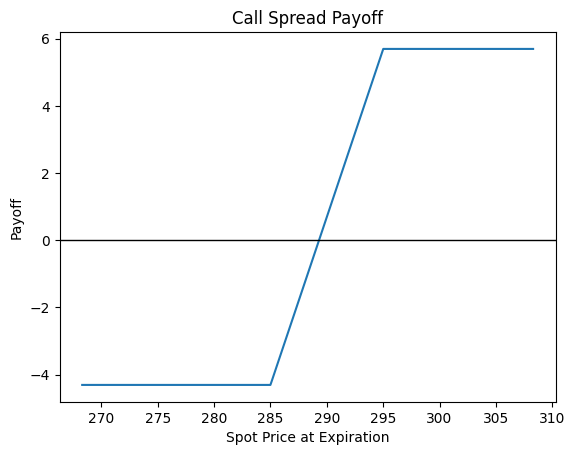

Option price black_scholes: 4.42
Estimated underlying asset price: 571.22

Call option binomial price: 3.347186090797799

--------------------------------------------------
Payouts at maturity (T): [1.15757255 0.         5.15112105 ... 2.5550261  0.         4.73887796]
Underlying asset price 288.29998779296875
Strike Price 290.0
option type put
Option price monte_carlo_option_price: 1.90



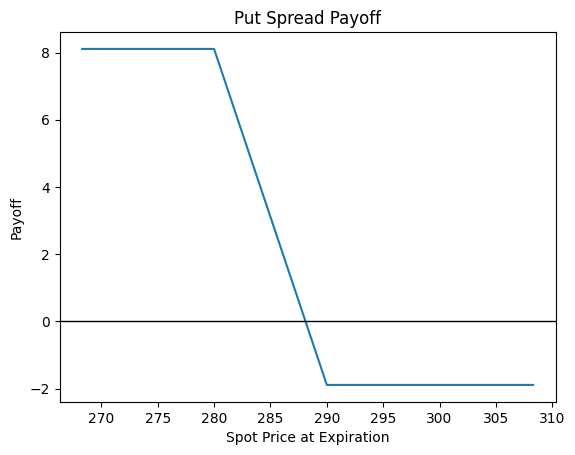

Option price black_scholes: 1.90
Estimated underlying asset price: 580.30

Put option binomial price: 3.0835480611046617

--------------------------------------------------
[*********************100%***********************]  1 of 1 completed
Payouts at maturity (T): [3.84242745 5.17202366 0.         ... 2.4449739  6.86720605 0.26112204]
Underlying asset price 288.29998779296875
Strike Price 285.0
option type call
Option price monte_carlo_option_price: 4.39



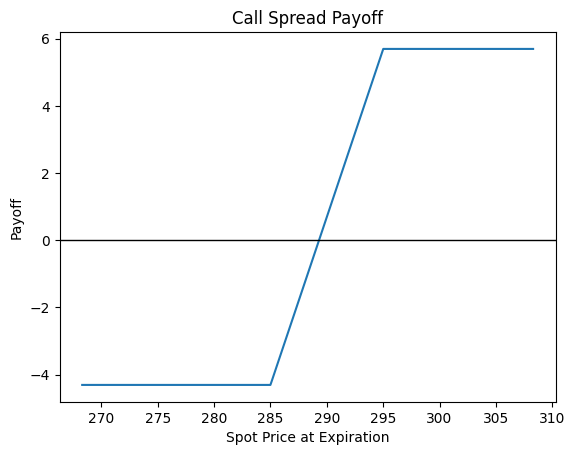

Option price black_scholes: 4.42
Estimated underlying asset price: 571.22

Call option binomial price: 3.347186090797799

--------------------------------------------------
Payouts at maturity (T): [1.15757255 0.         5.15112105 ... 2.5550261  0.         4.73887796]
Underlying asset price 288.29998779296875
Strike Price 290.0
option type put
Option price monte_carlo_option_price: 1.90



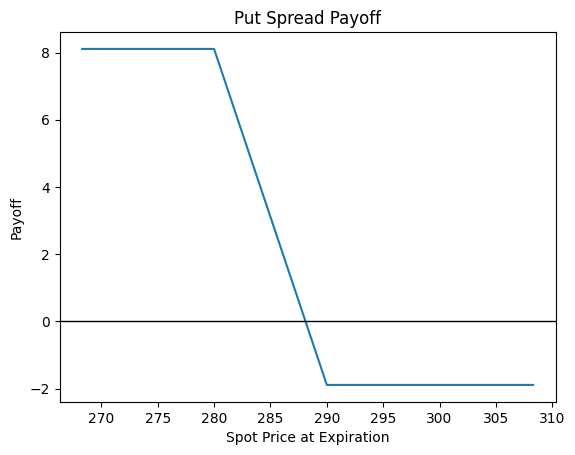

Option price black_scholes: 1.90
Estimated underlying asset price: 580.30

Put option binomial price: 3.0835480611046617

--------------------------------------------------
[*********************100%***********************]  1 of 1 completed
Payouts at maturity (T): [3.84242745 5.17202366 0.         ... 2.4449739  6.86720605 0.26112204]
Underlying asset price 288.29998779296875
Strike Price 285.0
option type call
Option price monte_carlo_option_price: 4.39



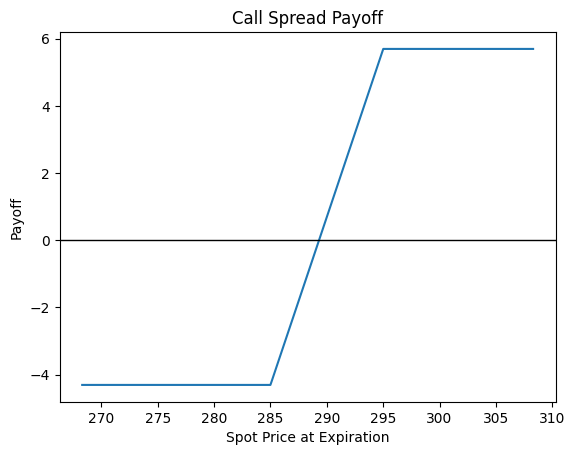

Option price black_scholes: 4.42
Estimated underlying asset price: 571.22

Call option binomial price: 3.347186090797799

--------------------------------------------------
Payouts at maturity (T): [1.15757255 0.         5.15112105 ... 2.5550261  0.         4.73887796]
Underlying asset price 288.29998779296875
Strike Price 290.0
option type put
Option price monte_carlo_option_price: 1.90



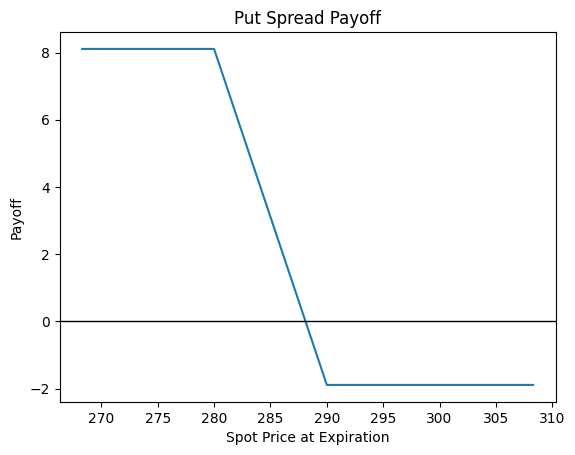

Option price black_scholes: 1.90
Estimated underlying asset price: 580.30

Put option binomial price: 3.0835480611046617

--------------------------------------------------

Symbol: TSLA
[*********************100%***********************]  1 of 1 completed
Payouts at maturity (T): [2.48660565 4.61752188 0.         ... 0.25984889 7.35174963 0.        ]
Underlying asset price 207.4600067138672
Strike Price 205.0
option type call
Option price monte_carlo_option_price: 4.16



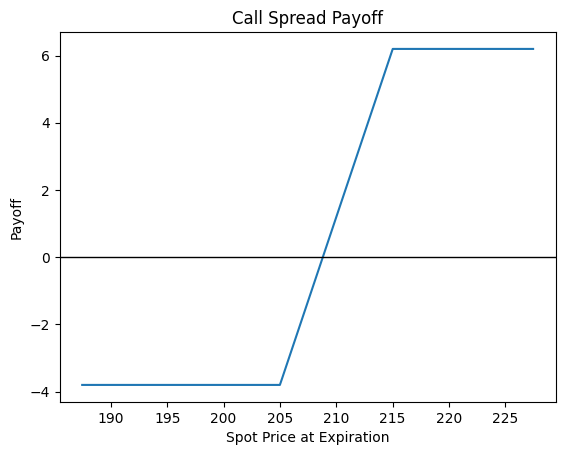

Option price black_scholes: 4.21
Estimated underlying asset price: 407.87

Call option binomial price: 3.527349487870846

--------------------------------------------------
Payouts at maturity (T): [0.01339435 0.         6.34178849 ... 2.24015111 0.         5.69351844]
Underlying asset price 207.4600067138672
Strike Price 207.5
option type put
Option price monte_carlo_option_price: 2.05



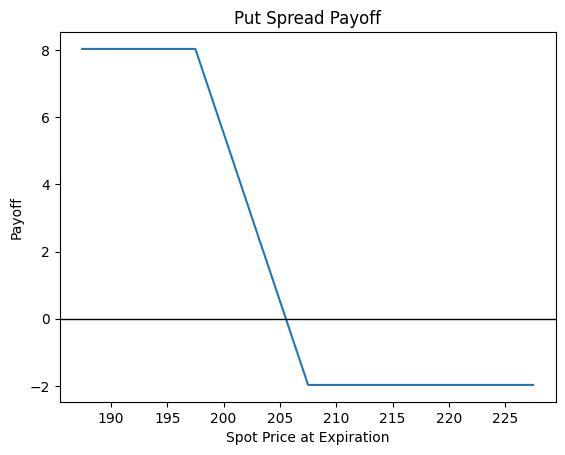

Option price black_scholes: 2.06
Estimated underlying asset price: 419.10

Put option binomial price: 2.6183385468380087

--------------------------------------------------
[*********************100%***********************]  1 of 1 completed
Payouts at maturity (T): [2.48660565 4.61752188 0.         ... 0.25984889 7.35174963 0.        ]
Underlying asset price 207.4600067138672
Strike Price 205.0
option type call
Option price monte_carlo_option_price: 4.16



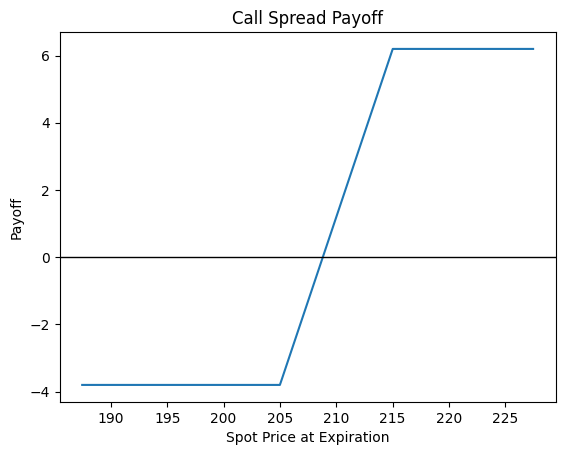

Option price black_scholes: 4.21
Estimated underlying asset price: 407.87

Call option binomial price: 3.527349487870846

--------------------------------------------------
Payouts at maturity (T): [0.01339435 0.         6.34178849 ... 2.24015111 0.         5.69351844]
Underlying asset price 207.4600067138672
Strike Price 207.5
option type put
Option price monte_carlo_option_price: 2.05



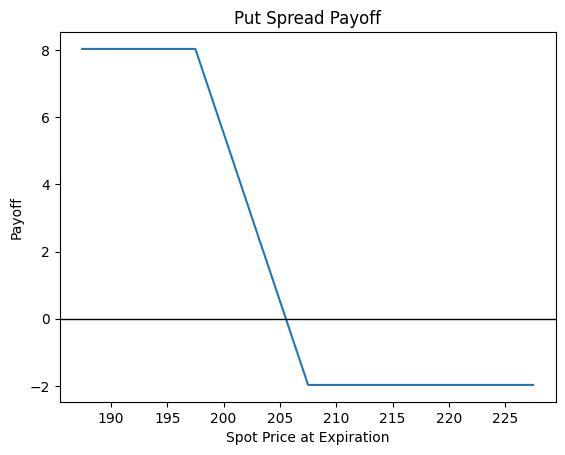

Option price black_scholes: 2.06
Estimated underlying asset price: 419.10

Put option binomial price: 2.6183385468380087

--------------------------------------------------
[*********************100%***********************]  1 of 1 completed
Payouts at maturity (T): [2.48660565 4.61752188 0.         ... 0.25984889 7.35174963 0.        ]
Underlying asset price 207.4600067138672
Strike Price 205.0
option type call
Option price monte_carlo_option_price: 4.16



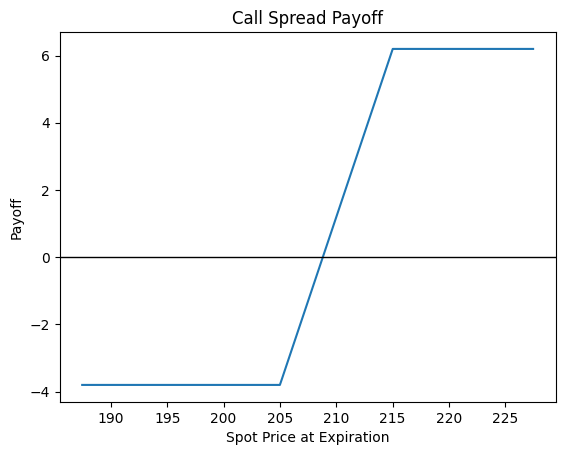

Option price black_scholes: 4.21
Estimated underlying asset price: 407.87

Call option binomial price: 3.527349487870846

--------------------------------------------------
Payouts at maturity (T): [0.01339435 0.         6.34178849 ... 2.24015111 0.         5.69351844]
Underlying asset price 207.4600067138672
Strike Price 207.5
option type put
Option price monte_carlo_option_price: 2.05



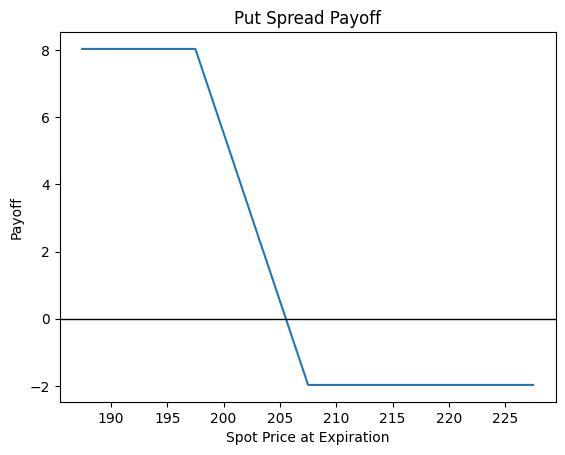

Option price black_scholes: 2.06
Estimated underlying asset price: 419.10

Put option binomial price: 2.6183385468380087

--------------------------------------------------



In [ ]:
import numpy as np

def monte_carlo_option_price(S, K, T, r, sigma, option_type, num_simulations=10000):
    if option_type not in ['call', 'put']:
        raise ValueError("option_type must be either 'call' or 'put'")

    np.random.seed(42)  # for reproducible results
    dt = T / 252  # daily time step, assuming 252 trading days per year

    # Simulate daily returns using geometric Brownian motion
    daily_returns = np.random.normal((r - 0.5 * sigma**2) * dt, sigma * np.sqrt(dt), size=(num_simulations, 252))

    # Calculate asset price paths
    price_paths = np.zeros_like(daily_returns)
    price_paths[:, 0] = S
    for t in range(1, 252):
        price_paths[:, t] = price_paths[:, t - 1] * np.exp(daily_returns[:, t])

    # Calculate option payouts at maturity
    if option_type == 'call':
        payouts = np.maximum(price_paths[:, -1] - K, 0)
    else:  # option_type == 'put'
        payouts = np.maximum(K - price_paths[:, -1], 0)

    # Discount payouts to present value and calculate average option price
    option_price = np.exp(-r * T) * np.mean(payouts)

    return option_price

def print_payouts(S, K, T, r, sigma, option_type, num_simulations=10000):
    if option_type not in ['call', 'put']:
        raise ValueError("option_type must be either 'call' or 'put'")

    np.random.seed(42)  # for reproducible results
    dt = T / 252  # daily time step, assuming 252 trading days per year

    # Simulate daily returns using geometric Brownian motion
    daily_returns = np.random.normal((r - 0.5 * sigma**2) * dt, sigma * np.sqrt(dt), size=(num_simulations, 252))

    # Calculate asset price paths
    price_paths = np.zeros_like(daily_returns)
    price_paths[:, 0] = S
    for t in range(1, 252):
        price_paths[:, t] = price_paths[:, t - 1] * np.exp(daily_returns[:, t])

    # Calculate option payouts at maturity
    if option_type == 'call':
        payouts = np.maximum(price_paths[:, -1] - K, 0)
    else:  # option_type == 'put'
        payouts = np.maximum(K - price_paths[:, -1], 0)

    # Print payouts at maturity
    print(f"Payouts at maturity (T): {payouts}")

    return price_paths



def put_payoff(spot, strike, premium):
    return np.maximum(strike - spot, 0) - premium

def put_spread_payoff(spot, lower_strike, upper_strike, lower_premium, upper_premium):
    long_put_payoff = put_payoff(spot, upper_strike, upper_premium)
    short_put_payoff = -put_payoff(spot, lower_strike, lower_premium)
    return long_put_payoff + short_put_payoff

def run_models(symbol = 'MSFT', option_type = 'call', expiration_date = '2023-04-21', strike_price=100, risk_free_rate=0.4, sigma=0.3 ):
    # Example usage
    S = get_underlying_price(symbol)  # Underlying asset price
    K = strike_price  # Strike price
    T = (pd.to_datetime(expiration_date) - pd.to_datetime('today')).days / 365 
    r = risk_free_rate  # Risk-free rate (2%)
    price_paths = print_payouts(S, K, T, r, sigma, option_type)



    print(f"Underlying asset price {S}")
    print(f'Strike Price {K}')
    print(f'option type {option_type}')

    option_price = monte_carlo_option_price(S, K, T, r, sigma, option_type, num_simulations= 10000)
    print(f"Option price monte_carlo_option_price: {option_price:.2f}\n")



    # Calculate call spread payoffs
    if option_type == 'call':
        lower_strike = strike_price
        upper_strike = strike_price + 10
        lower_premium = monte_carlo_option_price(S, lower_strike, T, r, sigma, option_type, num_simulations= 10000)
        upper_premium = monte_carlo_option_price(S, upper_strike, T, r, sigma, option_type, num_simulations= 10000)
        
        spot_range = np.linspace(S - 20, S + 20, num=1000)
        call_spread_payoffs = call_spread_payoff(spot_range, lower_strike, upper_strike, lower_premium, upper_premium)

        # Visualize the payout function
        plt.plot(spot_range, call_spread_payoffs)
        plt.axhline(0, color='black', lw=1)  # Add horizontal line at 0
        plt.xlabel("Spot Price at Expiration")
        plt.ylabel("Payoff")
        plt.title("Call Spread Payoff")
        plt.show()
    
    if option_type == 'put':
        lower_strike = strike_price - 10
        upper_strike = strike_price
        lower_premium = monte_carlo_option_price(S, lower_strike, T, r, sigma, option_type, num_simulations= 10000)
        upper_premium = monte_carlo_option_price(S, upper_strike, T, r, sigma, option_type, num_simulations= 10000)
        
        spot_range = np.linspace(S - 20, S + 20, num=1000)
        put_spread_payoffs = put_spread_payoff(spot_range, lower_strike, upper_strike, lower_premium, upper_premium)

        # Visualize the payout function
        plt.plot(spot_range, put_spread_payoffs)
        plt.axhline(0, color='black', lw=1)  # Add horizontal line at 0
        plt.xlabel("Spot Price at Expiration")
        plt.ylabel("Payoff")
        plt.title("Put Spread Payoff")
        plt.show()

    option_price = black_scholes(S, K, T, r, sigma, option_type)
    estimated_S = option_pricing_process(S, K, T, r, sigma, option_type)

    print(f"Option price black_scholes: {option_price:.2f}")
    print(f"Estimated underlying asset price: {estimated_S:.2f}\n")
    N= 1000
    bi_option_price = binomial_option_price(S, K, T, r, sigma, N, option_type)
    print(f"{option_type.capitalize()} option binomial price: {bi_option_price}\n")
    print("-"*50)
    
def run_sim(symbols):
    for symbol in symbols:
        print(f"Symbol: {symbol}")
        stock_data = get_stock_data(symbol, api_key)
        yield_curve = get_treasury_yield_curve()
        risk_free_rate = yield_curve['^IRX'].iloc[-1]
        expiration_date = pd.to_datetime('2023-04-28')
        sigma = calculate_annualized_volatility(stock_data['5._adjusted_close'], window=50).iloc[-1] 

        for id in [-1, -2, -3]:

            try:
                call_strike, put_strike = get_nearest_strike_price(symbol, expiration_date, threshold=0.05, index = id)
            except ValueError as e:
                error_msg = str(e)
                available_expirations_str = error_msg.split('[')[1].split(']')[0]
                available_expirations = [pd.Timestamp(exp) for exp in available_expirations_str.split(',')]
                print(f"Error: {error_msg}. Re-running simulation with expiration date: {available_expirations[0]}")
                call_strike, put_strike = get_nearest_strike_price(symbol, available_expirations[0], threshold=0.05)


            run_models(symbol = symbol, option_type = 'call', expiration_date = expiration_date, strike_price=call_strike, risk_free_rate=risk_free_rate, sigma=sigma)
            run_models(symbol = symbol, option_type = 'put', expiration_date = expiration_date, strike_price=put_strike, risk_free_rate=risk_free_rate, sigma=sigma)
        print()

# Example usage
symbols = ["MSFT", "TSLA"]
api_key = ""
run_sim(symbols)

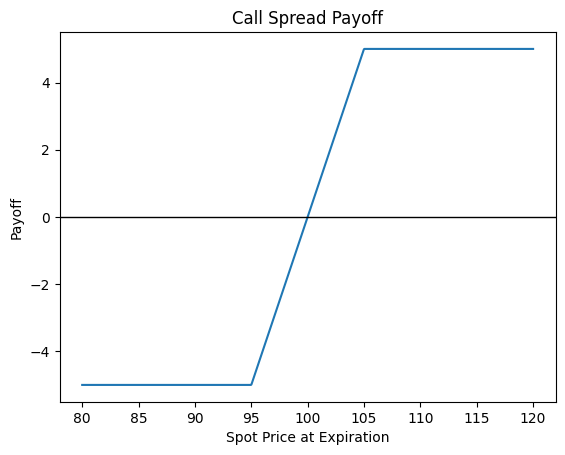

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def call_payoff(spot, strike, premium):
    return np.maximum(spot - strike, 0) - premium

def call_spread_payoff(spot, lower_strike, upper_strike, lower_premium, upper_premium):
    long_call_payoff = call_payoff(spot, lower_strike, lower_premium)
    short_call_payoff = -call_payoff(spot, upper_strike, upper_premium)
    return long_call_payoff + short_call_payoff

# Parameters
S = 100  # Current underlying asset price
K1 = 95   # Lower strike price
K2 = 105  # Upper strike price
lower_premium = 7  # Premium paid for the lower strike call option
upper_premium = 2  # Premium received for the upper strike call option

# Calculate call spread payoffs
spot_range = np.linspace(80, 120, num=1000)
call_spread_payoffs = call_spread_payoff(spot_range, K1, K2, lower_premium, upper_premium)

# Visualize the payout function
plt.plot(spot_range, call_spread_payoffs)
plt.axhline(0, color='black', lw=1)  # Add horizontal line at 0
plt.xlabel("Spot Price at Expiration")
plt.ylabel("Payoff")
plt.title("Call Spread Payoff")
plt.show()
